In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X,Y = make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [3]:
X.shape

(500, 2)

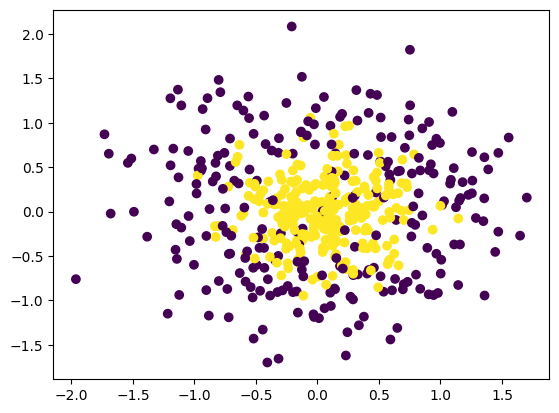

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

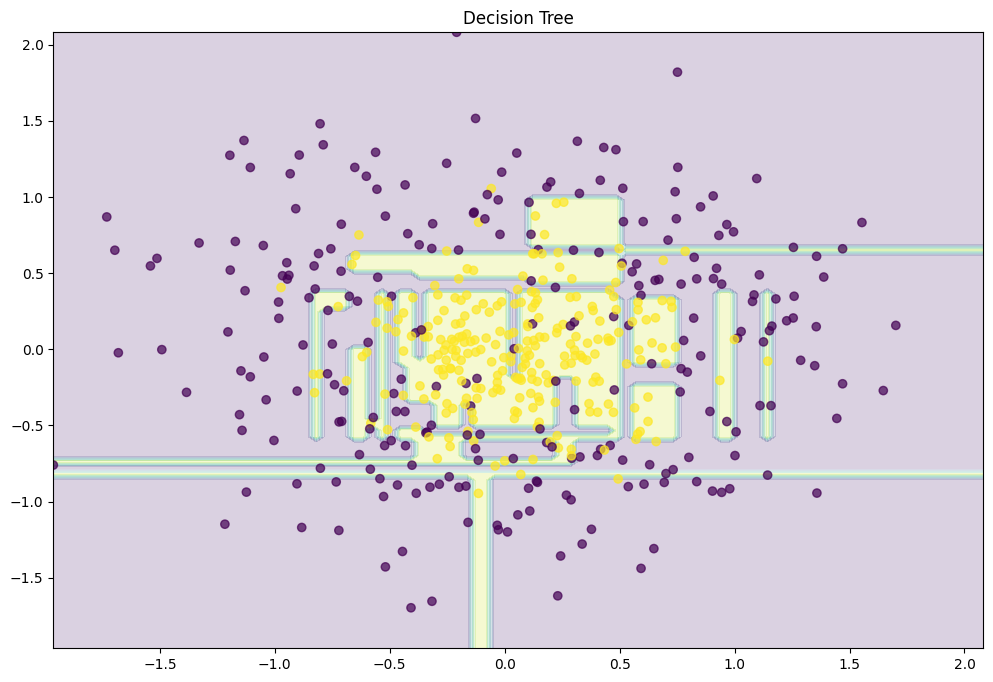

In [9]:
plt.figure(figsize=(12,8))
X_range = np.linspace(X.min(),X.max(),100)
XX1,XX2 = np.meshgrid(X_range,X_range)
Y_hat = dtree.predict(np.c_[XX1.ravel(),XX2.ravel()])
Y_hat = Y_hat.reshape(XX1.shape)
plt.contourf(XX1,XX2,Y_hat,alpha=0.2)
plt.scatter(X[:,0],X[:,1], c=Y, cmap='viridis',alpha=0.7)
plt.title("Decision Tree")
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier

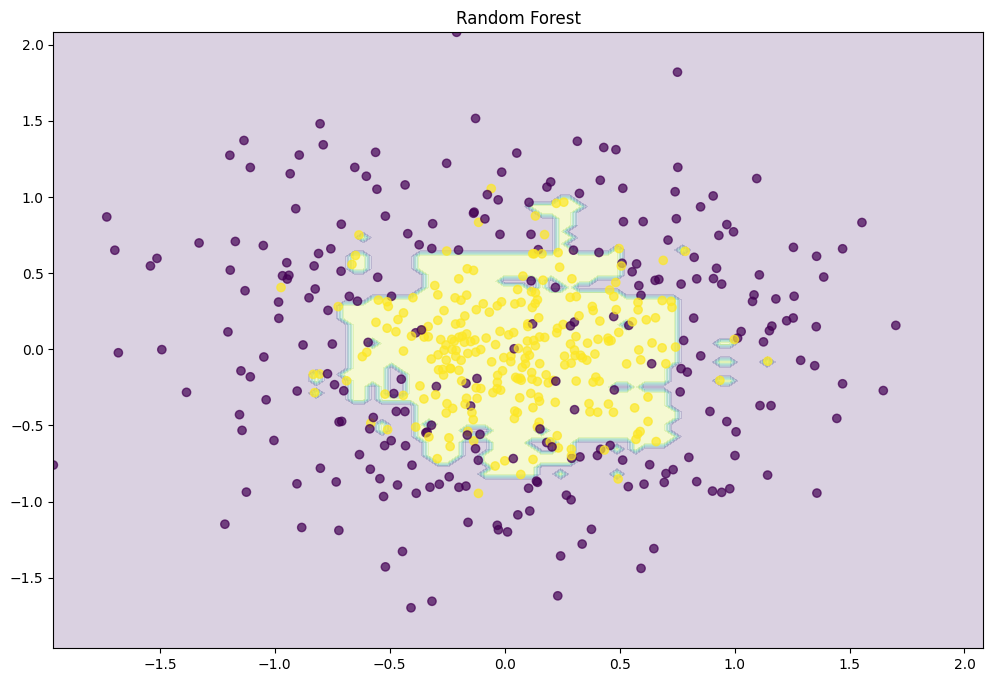

In [11]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train,Y_train)

plt.figure(figsize=(12,8))
X_range = np.linspace(X.min(),X.max(),100)
XX1,XX2 = np.meshgrid(X_range,X_range)
Y_hat = rf.predict(np.c_[XX1.ravel(),XX2.ravel()])
Y_hat = Y_hat.reshape(XX1.shape)
plt.contourf(XX1,XX2,Y_hat,alpha=0.2)
plt.scatter(X[:,0],X[:,1], c=Y, cmap='viridis',alpha=0.7)
plt.title("Random Forest")
plt.show()

## Regression

In [13]:
n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x-2)**2)

def generate(n_samples,noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    Y = np.exp(-X ** 2) + 1.5 * np.exp(-(X-2)**2) + np.random.normal(0.0,noise,n_samples)

    X = X.reshape(n_samples,1)

    return X,Y

X_train,Y_train = generate(n_samples=n_train,noise=noise)
X_test,Y_test = generate(n_samples=n_test,noise=noise)

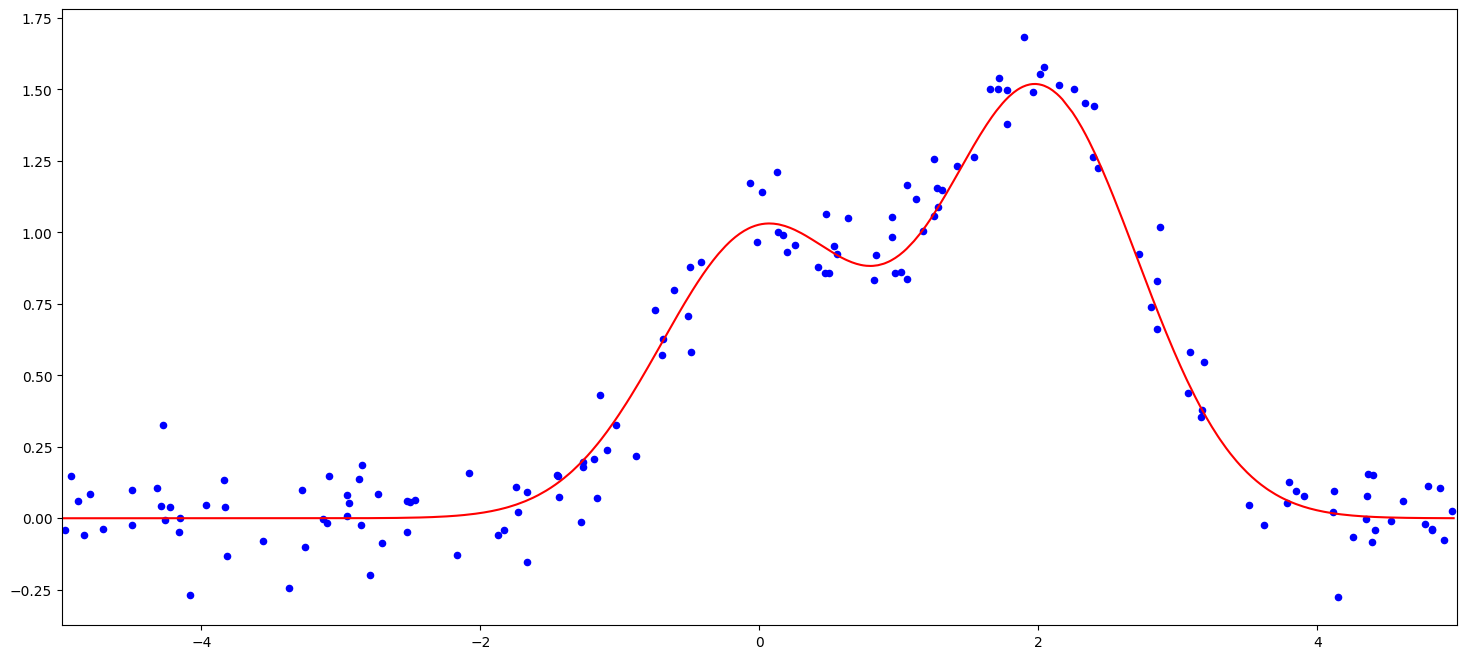

In [14]:
plt.figure(figsize=(18,8))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train,Y_train,c="b",s=20)
plt.xlim([-5,5])
plt.show()

In [15]:
from sklearn.tree import DecisionTreeRegressor

d_tree = DecisionTreeRegressor()
d_tree.fit(X_train,Y_train)

DecisionTreeRegressor()

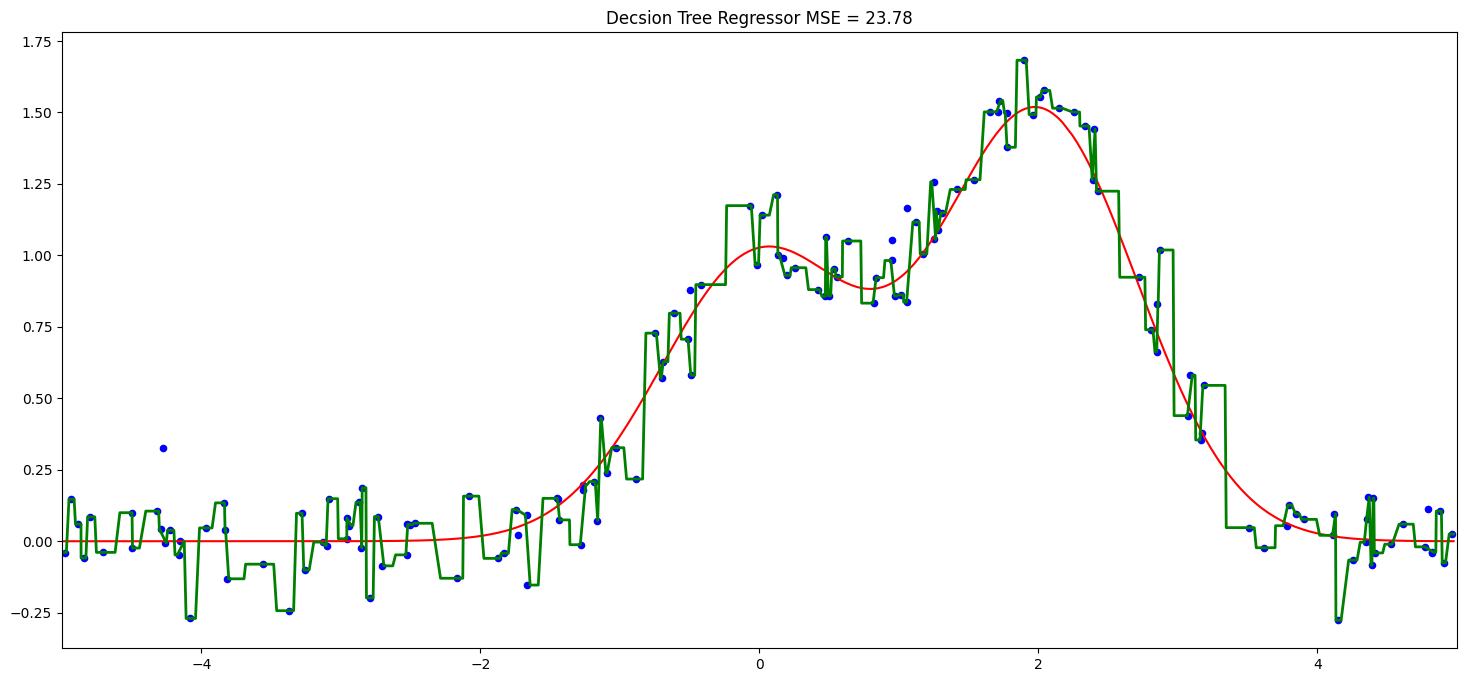

In [18]:
d_predict = d_tree.predict(X_test)

plt.figure(figsize=(18,8))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train,Y_train,c="b",s=20)
plt.plot(X_test,d_predict,"g",lw=2)
plt.xlim([-5,5])
plt.title("Decsion Tree Regressor MSE = %.2f"%np.sum((Y_test-d_predict)**2))
plt.show() #  Low Bias High Varience

In [19]:
from sklearn.ensemble import RandomForestRegressor
r_tree = RandomForestRegressor(n_estimators=1000)
r_tree.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=1000)

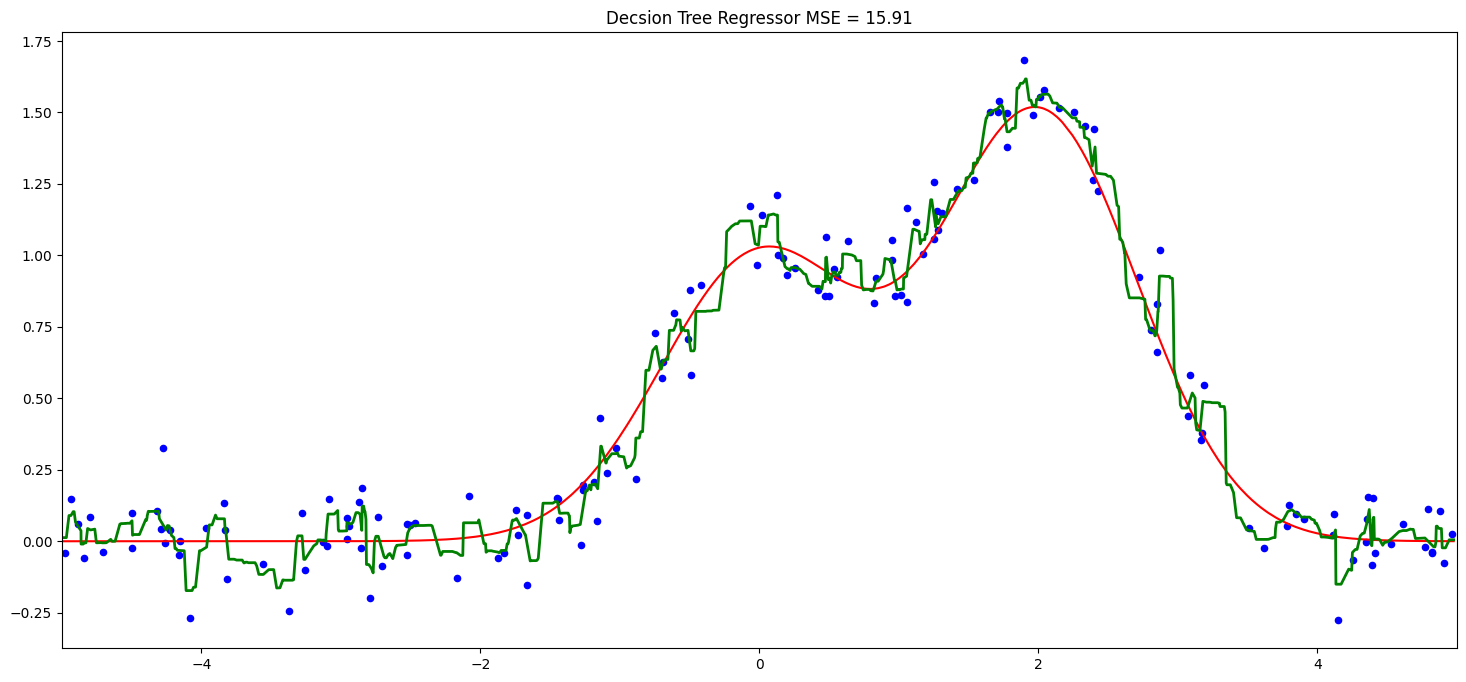

In [20]:
r_tree_predict = r_tree.predict(X_test)

plt.figure(figsize=(18,8))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train,Y_train,c="b",s=20)
plt.plot(X_test,r_tree_predict,"g",lw=2)
plt.xlim([-5,5])
plt.title("Decsion Tree Regressor MSE = %.2f"%np.sum((Y_test-r_tree_predict)**2))
plt.show() #  Low Bias Low Varience